## Business Case -  To built a prototype for the (MoveEase) business product.

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data

data=pd.read_csv('Metro_House_Rent.csv')

In [3]:
data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent
0,Bangalore,Brookefield,2,2,1,8,not acept,not furnished,2475,4800,99,63,7437
1,Delhi,Rohini sector 16,3,2,2,10,acept,furnished,4026,14850,858,192,19926
2,Bangalore,Haralur Road,3,2,0,-,acept,not furnished,0,7500,450,114,8064
3,Mumbai,Mulund East,2,2,1,-,acept,furnished,1719,4500,321,66,6606
4,Bangalore,Sarjapur Road,2,2,1,1,not acept,not furnished,840,3000,414,39,4293


In [4]:
data.tail()

,city,area,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent
10687,Bangalore,Whitefield,1,2,1,9,not acept,furnished,2550,9000,630,117,12297
10688,Kolkata,Howrah,2,2,1,4,acept,not furnished,765,4200,243,57,5265
10689,Kolkata,Bangur avenue,1,1,0,1,not acept,not furnished,0,3600,111,48,3759
10690,Bangalore,Tumkur Road,3,4,3,4,acept,not furnished,4950,27000,2001,345,34290
10691,Bangalore,Rajaji Nagar,3,2,1,2,acept,furnished,3504,18870,699,240,23313


### Basic Checks

In [5]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal_allowance', 'furniture', 'association_tax', 'rent_amount',
       'property_tax', 'fire_insurance', 'total_rent'],
      dtype='object')

In [6]:
data.shape

(10692, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              10692 non-null  object
 1   area              10692 non-null  object
 2   rooms             10692 non-null  int64 
 3   bathroom          10692 non-null  int64 
 4   parking_spaces    10692 non-null  int64 
 5   floor             10692 non-null  object
 6   animal_allowance  10692 non-null  object
 7   furniture         10692 non-null  object
 8   association_tax   10692 non-null  int64 
 9   rent_amount       10692 non-null  int64 
 10  property_tax      10692 non-null  int64 
 11  fire_insurance    10692 non-null  int64 
 12  total_rent        10692 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


In [8]:
data.describe()

,rooms,bathroom,parking_spaces,association_tax,rent_amount,property_tax,fire_insurance,total_rent
count,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,2.506079,2.236813,1.609147,3.522065e+03,11688.741582,1100.113075,159.902637,1.647146e+04
std,1.171266,1.407198,1.589521,4.677692e+04,10225.636553,9323.496963,143.304093,4.945418e+04
min,1.000000,1.000000,0.000000,0.000000e+00,1350.000000,0.000000,9.000000,1.497000e+03
25%,2.000000,1.000000,0.000000,5.100000e+02,4590.000000,114.000000,63.000000,6.185250e+03
50%,2.000000,2.000000,1.000000,1.680000e+03,7983.000000,375.000000,108.000000,1.074450e+04
75%,3.000000,3.000000,2.000000,3.712500e+03,15000.000000,1125.000000,204.000000,2.030400e+04
max,13.000000,10.000000,12.000000,3.351000e+06,135000.000000,941100.000000,2031.000000,3.360000e+06


In [9]:
data.describe(include='O')

,city,area,floor,animal_allowance,furniture
count,10692,10692,10692,10692,10692
unique,5,1406,35,2,2
top,Bangalore,Whitefield,-,acept,not furnished
freq,5887,177,2461,8316,8086


Skipping the EDA for now and directly moving with data preprocessing

### Data Preprocessing

In [10]:
data.isnull().sum()

city                0
area                0
rooms               0
bathroom            0
parking_spaces      0
floor               0
animal_allowance    0
furniture           0
association_tax     0
rent_amount         0
property_tax        0
fire_insurance      0
total_rent          0
dtype: int64

In [11]:
data.duplicated().sum()

358

In [12]:
data.loc[data.duplicated()==True]

,city,area,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent
148,Delhi,Mehrauli,3,1,0,-,acept,not furnished,0,4800,120,75,4995
275,Mumbai,Kanjurmarg,1,1,0,2,acept,not furnished,300,2880,225,45,3450
540,Delhi,Dwarka Mor,1,2,0,-,not acept,not furnished,0,3600,0,57,3657
830,Chennai,Ambattur,3,3,2,-,acept,not furnished,1680,9600,264,147,11691
938,Delhi,Shivalik,1,1,0,4,acept,not furnished,1896,5100,258,66,7320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,Mumbai,Powai,1,1,1,1,not acept,furnished,1200,6600,0,99,7899
10614,Bangalore,7th Phase JP Nagar,1,1,2,8,acept,not furnished,2085,5400,510,69,8064
10646,Delhi,Sector 8 Dwarka,2,1,1,4,acept,not furnished,1875,3600,357,48,5880
10647,Bangalore,Horamavu Agara,2,2,1,4,acept,not furnished,1500,6000,0,78,7578


In [13]:
#dropping the duplicates

data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal_allowance', 'furniture', 'association_tax', 'rent_amount',
       'property_tax', 'fire_insurance', 'total_rent'],
      dtype='object')

In [16]:
data_num=data[['rooms','bathroom', 'parking_spaces','association_tax', 'rent_amount',
       'property_tax', 'fire_insurance', 'total_rent']]

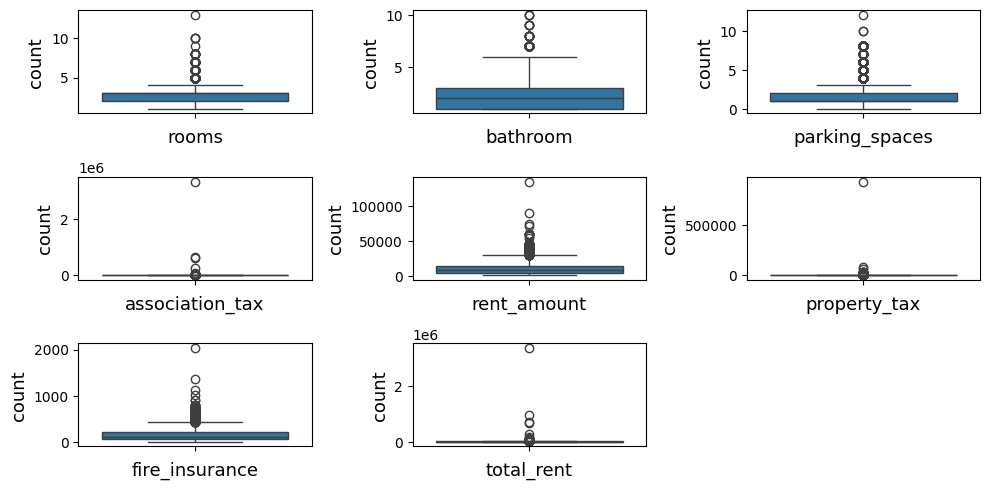

In [17]:
plt.figure(figsize=(10,5),facecolor='white')
columnnum=1

for column in data_num:
    if columnnum<=9:
        ax=plt.subplot(3,3,columnnum)
        sns.boxplot(data_num[column])
        plt.xlabel(column,fontsize=13)
        plt.ylabel('count',fontsize=13)
    columnnum+=1
plt.tight_layout()

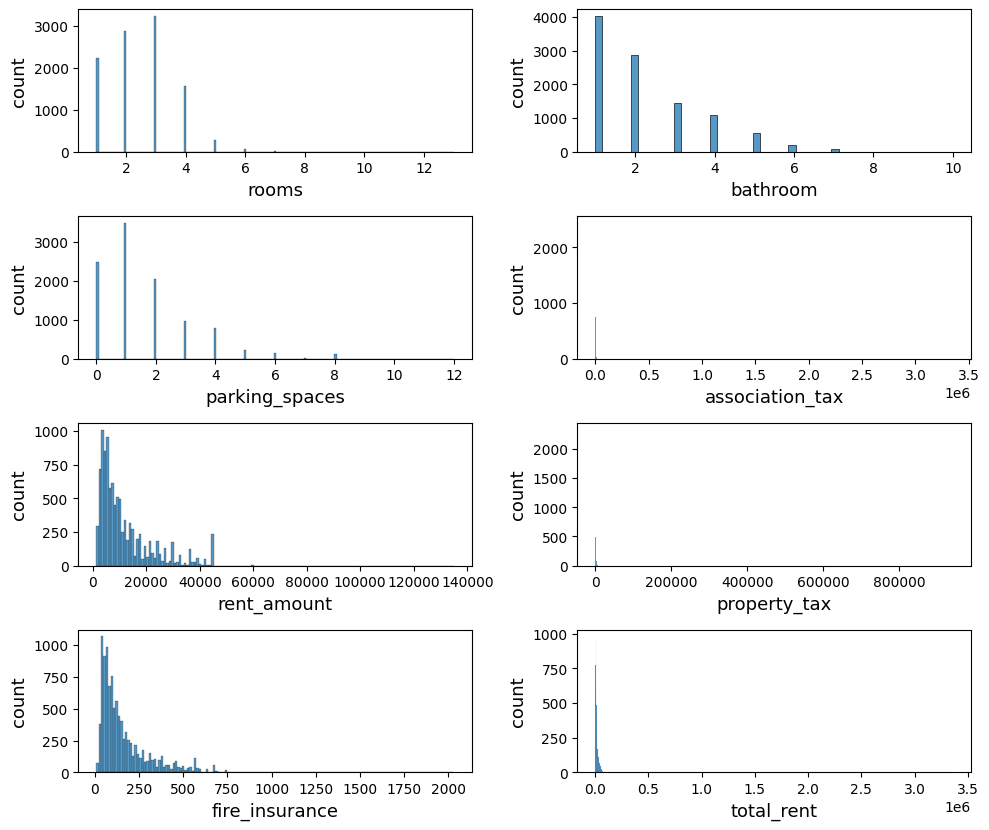

In [18]:
# imputing the outliers

plt.figure(figsize=(10,10),facecolor='white')
columnnum=1

for column in data_num:
    if columnnum<=9:
        ax=plt.subplot(5,2,columnnum)
        sns.histplot(data_num[column])
        plt.xlabel(column,fontsize=13)
        plt.ylabel('count',fontsize=13)
    columnnum+=1
plt.tight_layout()

In [19]:
columnnum = 0  # Initialize column index

for column in data_num:
    if columnnum <= 9:
        try:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            print(f"  Q1 = {Q1}")
            print(f"  Q3 = {Q3}")
            print(f"  IQR = {IQR}")
            print(f"  Lower Limit = {lower_limit}")
            print(f"  Upper Limit = {upper_limit}")
            print("**********************************")
        except Exception as e:
            print(f"  ❌ Failed '{column}': {e}")
    
    columnnum += 1

  Q1 = 2.0
  Q3 = 3.0
  IQR = 1.0
  Lower Limit = 0.5
  Upper Limit = 4.5
**********************************
  Q1 = 1.0
  Q3 = 3.0
  IQR = 2.0
  Lower Limit = -2.0
  Upper Limit = 6.0
**********************************
  Q1 = 1.0
  Q3 = 2.0
  IQR = 1.0
  Lower Limit = -0.5
  Upper Limit = 3.5
**********************************
  Q1 = 540.0
  Q3 = 3860.25
  IQR = 3320.25
  Lower Limit = -4440.375
  Upper Limit = 8840.625
**********************************
  Q1 = 4794.75
  Q3 = 15000.0
  IQR = 10205.25
  Lower Limit = -10513.125
  Upper Limit = 30307.875
**********************************
  Q1 = 123.0
  Q3 = 1169.25
  IQR = 1046.25
  Lower Limit = -1446.375
  Upper Limit = 2738.625
**********************************
  Q1 = 63.0
  Q3 = 210.0
  IQR = 147.0
  Lower Limit = -157.5
  Upper Limit = 430.5
**********************************
  Q1 = 6348.0
  Q3 = 20736.0
  IQR = 14388.0
  Lower Limit = -15234.0
  Upper Limit = 42318.0
**********************************


In [20]:
columnnum = 0  # Initialize column index

for column in data_num:
    if columnnum <= 9:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        print(f"Column: {column}")
        print(f"  Q1 = {Q1}")
        print(f"  Q3 = {Q3}")
        print(f"  IQR = {IQR}")
        print(f"  Lower Limit = {lower_limit}")
        print(f"  Upper Limit = {upper_limit}")

        # calculating the percentage of outliers above upper_limit
        outliers_count = (data[column] > upper_limit).sum()
        outliers_pct = (outliers_count / len(data[column])) * 100

        print(f"  Outliers above upper limit: {outliers_count} ({outliers_pct:.2f}%)")

        if outliers_pct <= 5:
            # Impute outliers by capping them at median
            median_val = data[column].median()
            data.loc[data[column] > upper_limit, column] = median_val
            print(f"  Outliers capped to median value: {median_val}")
        else:
            print("  Unable to impute outliers: more than 5% outliers present")

        print("**********************************\n")
        
    columnnum += 1


Column: rooms
  Q1 = 2.0
  Q3 = 3.0
  IQR = 1.0
  Lower Limit = 0.5
  Upper Limit = 4.5
  Outliers above upper limit: 407 (3.94%)
  Outliers capped to median value: 3.0
**********************************

Column: bathroom
  Q1 = 1.0
  Q3 = 3.0
  IQR = 2.0
  Lower Limit = -2.0
  Upper Limit = 6.0
  Outliers above upper limit: 103 (1.00%)
  Outliers capped to median value: 2.0
**********************************

Column: parking_spaces
  Q1 = 1.0
  Q3 = 2.0
  IQR = 1.0
  Lower Limit = -0.5
  Upper Limit = 3.5
  Outliers above upper limit: 1337 (12.94%)
  Unable to impute outliers: more than 5% outliers present
**********************************

Column: association_tax
  Q1 = 540.0
  Q3 = 3860.25
  IQR = 3320.25
  Lower Limit = -4440.375
  Upper Limit = 8840.625
  Outliers above upper limit: 655 (6.34%)
  Unable to impute outliers: more than 5% outliers present
**********************************

Column: rent_amount
  Q1 = 4794.75
  Q3 = 15000.0
  IQR = 10205.25
  Lower Limit = -10513.125

### As we can see in the data outliers are more than % hence irt cannot be considered outliers as it hold important information hence not imputing the outliers

In [21]:

# Replacing '-' with NaN, and converting to numeric
data['floor'] = data['floor'].replace('-', np.nan)
data['floor'] = pd.to_numeric(data['floor'], errors='coerce')

# Imputing missing floors with median or mode
data['floor'] = data['floor'].fillna(data['floor'].median())


In [22]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal_allowance', 'furniture', 'association_tax', 'rent_amount',
       'property_tax', 'fire_insurance', 'total_rent'],
      dtype='object')

In [23]:
data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent
0,Bangalore,Brookefield,2,2,1,8.0,not acept,not furnished,2475,4800,99,63,7437
1,Delhi,Rohini sector 16,3,2,2,10.0,acept,furnished,4026,14850,858,192,19926
2,Bangalore,Haralur Road,3,2,0,5.0,acept,not furnished,0,7500,450,114,8064
3,Mumbai,Mulund East,2,2,1,5.0,acept,furnished,1719,4500,321,66,6606
4,Bangalore,Sarjapur Road,2,2,1,1.0,not acept,not furnished,840,3000,414,39,4293


In [24]:
# Label encoding 'area' in the original dataframe
from sklearn.preprocessing import LabelEncoder
le_area = LabelEncoder()
data['area_encoded'] = le_area.fit_transform(data['area'])

# Dropping the original 'area' column
data = data.drop('area', axis=1)

In [25]:
#One-hot encoding other categorical columns in the dataframe
categorical_cols = ['city', 'animal_allowance', 'furniture']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

In [26]:
#Identifyingnumeric columns to scale (including 'area_encoded')
numerical_cols_after_encoding = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [27]:
#Scaling numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[numerical_cols_after_encoding] = scaler.fit_transform(data_encoded[numerical_cols_after_encoding])

In [28]:
data_encoded

,rooms,bathroom,parking_spaces,floor,association_tax,rent_amount,property_tax,fire_insurance,total_rent,area_encoded,city_Bangalore,city_Chennai,city_Delhi,city_Kolkata,city_Mumbai,animal_allowance_acept,animal_allowance_not acept,furniture_furnished,furniture_not furnished
0,-0.445291,-0.163649,-0.403187,0.322372,-0.023262,-0.688673,-0.108823,-0.690674,-0.237593,229,True,False,False,False,False,False,True,False,True
1,0.562514,-0.163649,0.222419,0.690399,0.021909,0.286291,-0.028771,0.202145,0.091018,1023,False,False,True,False,False,True,False,True,False
2,0.562514,-0.163649,-1.028793,-0.229670,-0.095342,-0.426742,-0.071803,-0.337699,-0.221095,443,True,False,False,False,False,True,False,False,True
3,-0.445291,-0.163649,-0.403187,-0.229670,-0.045279,-0.717776,-0.085409,-0.669911,-0.259458,797,False,False,False,False,True,True,False,True,False
4,-0.445291,-0.163649,-0.403187,-0.965726,-0.070879,-0.863293,-0.075600,-0.856780,-0.320318,1061,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,-1.453097,-0.163649,-0.403187,0.506385,-0.021078,-0.281225,-0.052818,-0.316936,-0.109717,1363,True,False,False,False,False,False,True,True,False
10688,-0.445291,-0.163649,-0.403187,-0.413684,-0.073063,-0.746880,-0.093635,-0.732200,-0.294742,478,False,False,False,True,False,True,False,False,True
10689,-1.453097,-0.920656,-1.028793,-0.965726,-0.095342,-0.805086,-0.107557,-0.794490,-0.334368,154,False,False,False,True,False,False,True,False,True
10690,0.562514,1.350364,0.848025,-0.413684,0.048819,1.464979,0.091781,1.261070,0.468963,1270,True,False,False,False,False,True,False,False,True


### Model Creation for House Recommendation system 

### Building the content-based housing recommendation system model

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix=cosine_similarity(data_encoded)

In [30]:
def recommend_houses(index, top_n=5):
    sim_scores = list(enumerate(similarity_matrix[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [x for x in sim_scores if x[0] != index]  # Exclude itself
    top_similar_indices = [i[0] for i in sim_scores[:top_n]]
    return data.iloc[top_similar_indices]


In [31]:
recommended = recommend_houses(0)
print(recommended)


            city  rooms  bathroom  parking_spaces  floor animal_allowance  \
3192   Bangalore      2         2               1    9.0        not acept   
1776   Bangalore      2         2               1    8.0        not acept   
8793   Bangalore      2         2               1    6.0        not acept   
6040   Bangalore      2         2               1    6.0        not acept   
10496  Bangalore      2         2               1    5.0        not acept   

           furniture  association_tax  rent_amount  property_tax  \
3192   not furnished             2046         3117           126   
1776   not furnished             1800         7200           375   
8793   not furnished             1500         4050            15   
6040   not furnished             4770         7470           474   
10496  not furnished              360         5550             0   

       fire_insurance  total_rent  area_encoded  
3192               42        5331           251  
1776               93       

##### Using content-based filtering with cosine similarity, we selected a specific property as the reference (e.g., a 2BHK apartment in Bangalore), and the system searched for properties most similar in terms of features.

The top recommended properties were: 
1. All located in Bangalore

2. Had 2 rooms, 2 bathrooms, and 1 parking space

3. Did not allow pets

4. Were not furnished

5. Had similar rent ranges and other cost-related features (e.g., total rent between ₹5,000 and ₹12,000)

6. Shared similar area codes, indicating neighborhoods or sectors with similar characteristics

These recommendations are made entirely based on feature similarity, not popularity or user preference — this is typical for a content-based system.

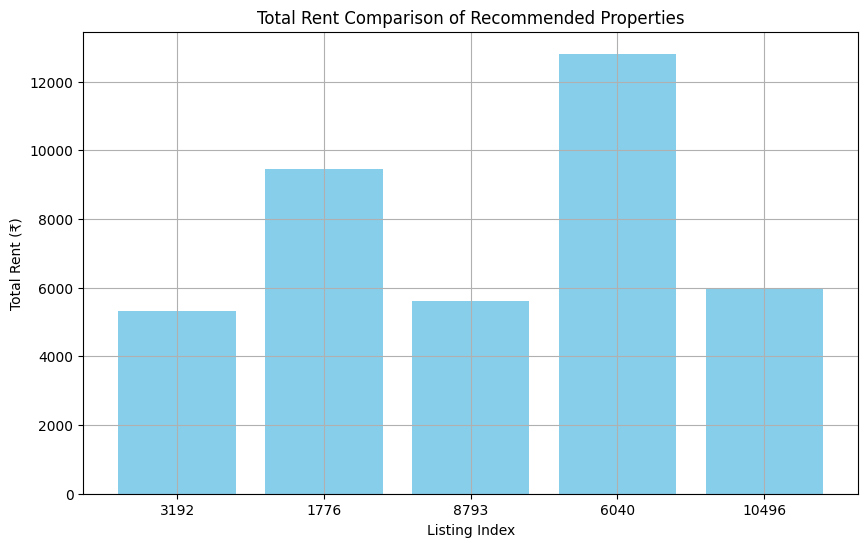

In [32]:
import matplotlib.pyplot as plt

# Use the correct variable name (replace 'recommended' with your actual result variable if different)
plt.figure(figsize=(10, 6))
plt.bar(recommended.index.astype(str), recommended['total_rent'], color='skyblue')
plt.title("Total Rent Comparison of Recommended Properties")
plt.xlabel("Listing Index")
plt.ylabel("Total Rent (₹)")
plt.grid(True)
plt.show()


### Insights
Different Prices for Similar Homes
Even though the recommended houses have similar features (like 2 rooms, 2 bathrooms, same city), their total rent is not the same.

Some Homes Are Cheaper
One or two homes in the list have much lower rent than others. These might be better deals for someone looking to save money.

Some Homes Are More Expensive
A few homes have higher rent, maybe because they have higher society charges, insurance, or are in a better area.

### As this Model is Content-based we can add multiple filters to it

In [33]:
# Filter listings based on city and minimum number of rooms
preferred_city = 'Mumbai'
min_rooms = 1

filtered_data = data[(data['city'] == preferred_city) & (data['rooms'] >= min_rooms)]

print(f"Filtered down to {len(filtered_data)} listings in {preferred_city} with at least {min_rooms} rooms.\n")

filtered_data

Filtered down to 1154 listings in Mumbai with at least 1 rooms.



,city,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent,area_encoded
3,Mumbai,2,2,1,5.0,acept,furnished,1719,4500,321,66,6606,797
15,Mumbai,1,1,1,2.0,acept,furnished,900,4500,69,66,5535,1234
17,Mumbai,3,4,4,4.0,not acept,not furnished,6000,12000,3750,177,21927,1233
20,Mumbai,2,2,1,2.0,acept,not furnished,1200,6600,276,99,8175,258
21,Mumbai,1,1,0,4.0,acept,not furnished,600,2100,114,33,2847,564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,Mumbai,4,4,2,2.0,acept,not furnished,3300,5400,915,81,9696,295
10635,Mumbai,2,1,0,3.0,acept,not furnished,978,3000,126,45,4149,625
10668,Mumbai,2,1,0,1.0,not acept,not furnished,555,4500,81,66,5202,1277
10669,Mumbai,2,1,0,9.0,acept,not furnished,1140,5400,273,81,6894,338


In [34]:
data['city']

0        Bangalore
1            Delhi
2        Bangalore
3           Mumbai
4        Bangalore
           ...    
10687    Bangalore
10688      Kolkata
10689      Kolkata
10690    Bangalore
10691    Bangalore
Name: city, Length: 10334, dtype: object

In [35]:
# Filter listings based on city and minimum number of rooms
preferred_city = 'Kolkata'

filtered_data = data[(data['city'] == preferred_city)]

print(f"Filtered down to {len(filtered_data)} listings in {preferred_city} \n")

filtered_data

Filtered down to 1209 listings in Kolkata 



,city,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent,area_encoded
9,Kolkata,3,3,0,5.0,acept,not furnished,0,10500,426,174,11100,1289
22,Kolkata,2,1,1,2.0,acept,not furnished,600,3150,81,42,3873,300
30,Kolkata,2,1,1,11.0,acept,not furnished,2691,3900,375,54,7020,867
34,Kolkata,2,3,1,4.0,acept,not furnished,1800,11280,840,153,14073,347
51,Kolkata,4,2,2,3.0,acept,not furnished,2331,6000,711,81,9123,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,Kolkata,3,3,4,5.0,acept,not furnished,2700,20400,501,336,23937,534
10623,Kolkata,4,3,4,7.0,acept,furnished,9300,45000,4500,600,59400,589
10684,Kolkata,3,3,8,5.0,acept,not furnished,0,30000,2421,492,32910,386
10688,Kolkata,2,2,1,4.0,acept,not furnished,765,4200,243,57,5265,478


In [36]:
data['furniture'].unique()

array(['not furnished', 'furnished'], dtype=object)

In [37]:
# Filter listings on furniture and rent amount

preferred_city = 'Chennai'
preffered_rentamt ='15000'
furniture='furnished'


filtered_data = data[
    ((data['city'] == preferred_city) & (data['rent_amount'] == preffered_rentamt)) 
    | 
    (data['furniture'] == furniture)
]

print(f"Filtered down to {len(filtered_data)} listings in {preferred_city} and {preffered_rentamt} with {furniture} \n")

filtered_data

Filtered down to 2515 listings in Chennai and 15000 with furnished 



,city,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent,area_encoded
1,Delhi,3,2,2,10.0,acept,furnished,4026,14850,858,192,19926,1023
3,Mumbai,2,2,1,5.0,acept,furnished,1719,4500,321,66,6606,797
5,Bangalore,2,2,0,1.0,acept,furnished,2550,18000,750,231,21531,1198
6,Delhi,2,1,0,7.0,not acept,furnished,4200,15000,732,195,20127,752
15,Mumbai,1,1,1,2.0,acept,furnished,900,4500,69,66,5535,1234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,Bangalore,3,3,2,1.0,not acept,furnished,6252,8100,1818,105,16275,603
10672,Bangalore,2,2,1,14.0,not acept,furnished,2748,16950,177,216,20091,580
10680,Bangalore,3,3,2,14.0,acept,furnished,6300,21000,2502,267,30060,802
10687,Bangalore,1,2,1,9.0,not acept,furnished,2550,9000,630,117,12297,1363


As we collect and include more data in our housing recommendation system, it will become much better at understanding what each customer really wants. Right now, we look at things like location, price, number of bedrooms, and some amenities, but with more detailed information—such as user preferences, past searches or interactions, and additional property details—we can make recommendations that match customers’ needs more closely. This means the system won’t just suggest random houses, but homes that fit what the customer is looking for in terms of style, budget, location, and features.

One exciting way to improve the system is by partnering with local brokers. Many landlords prefer to work with local brokers rather than listing their properties on popular websites. These brokers often have access to exclusive listings that are not available online. By working with them, we can offer premium customers access to a wider range of high-quality properties that others might not even know about yet. This gives our customers a big advantage—they get to see and choose from the best homes early, increasing their chances of finding the perfect place.

In addition, local brokers bring valuable insights about the neighborhood, property conditions, and market trends that can be included in the system. This extra knowledge helps us recommend not only good properties but also ones that are a smart investment or offer great living experiences.

Overall, as the model grows with more data and stronger partnerships, it will become a powerful tool that makes house hunting easier, faster, and more successful. Customers will benefit from highly personalized suggestions and exclusive options, making their search for a new home much more enjoyable and less stressful.



### Model Creation for Housemate matching system

In [38]:
housemate=pd.read_csv('Housemate data.csv') #loading the data

In [39]:
housemate

,User ID,Age,Gender,Profession,Monthly Budget,Preferred Location,Smoking,Drinking,Pets,Wake Time,Cleanliness Level,Room Type,Roommate Gender Preference,Hobbies
0,U100,31,Male,Software Engineer,"15,012",Baner,Yes,Yes,Yes,Morning,High,Private,Male,Reading
1,U101,24,Male,Student,"6,869",Hinjewadi,Yes,No,Yes,Night,High,Private,Male,Fitness
2,U102,27,Female,Teacher,"11,094",Baner,No,Yes,Yes,Night,Low,Private,Female,"Cooking, Reading, Traveling"
3,U103,29,Male,Data Analyst,"8,582",Hinjewadi,No,No,Yes,Morning,Low,Shared,Female,Photography
4,U104,24,Male,Data Analyst,"15,108",Kothrud,No,Yes,No,Night,Low,Private,Any,"Fitness, Reading, Music"
5,U105,31,Male,Student,"14,021",Baner,No,No,No,Morning,High,Private,Male,Photography
6,U106,21,Female,Data Analyst,"14,773",Wakad,Yes,No,Yes,Night,Medium,Private,Male,"Gaming, Photography"
7,U107,32,Other,Student,"14,609",Hinjewadi,No,No,No,Morning,Low,Private,Male,Photography
8,U108,22,Male,Consultant,"11,242",Kothrud,Yes,No,No,Night,High,Private,Any,Fitness
9,U109,32,Male,Consultant,"23,595",Kharadi,No,Yes,No,Night,Low,Private,Male,"Fitness, Cooking, Music"


Above data is pseudo data and generated according to the preferences of the roommate matching market for the prototype of the product. The data provided is limited to Pune city only, In order to provide housemate matching services in every city we need to collect the data from different sources and area.

In [40]:
housemate.head()

,User ID,Age,Gender,Profession,Monthly Budget,Preferred Location,Smoking,Drinking,Pets,Wake Time,Cleanliness Level,Room Type,Roommate Gender Preference,Hobbies
0,U100,31,Male,Software Engineer,"15,012",Baner,Yes,Yes,Yes,Morning,High,Private,Male,Reading
1,U101,24,Male,Student,"6,869",Hinjewadi,Yes,No,Yes,Night,High,Private,Male,Fitness
2,U102,27,Female,Teacher,"11,094",Baner,No,Yes,Yes,Night,Low,Private,Female,"Cooking, Reading, Traveling"
3,U103,29,Male,Data Analyst,"8,582",Hinjewadi,No,No,Yes,Morning,Low,Shared,Female,Photography
4,U104,24,Male,Data Analyst,"15,108",Kothrud,No,Yes,No,Night,Low,Private,Any,"Fitness, Reading, Music"


In [41]:


housemate.tail()

,User ID,Age,Gender,Profession,Monthly Budget,Preferred Location,Smoking,Drinking,Pets,Wake Time,Cleanliness Level,Room Type,Roommate Gender Preference,Hobbies
16,U116,26,Male,Graphic Designer,"10,000",Kothrud,Yes,No,Yes,Night,Low,Shared,Male,"Music, Drawing"
17,U117,30,Male,Engineer,"16,000",Baner,No,Yes,No,Morning,High,Private,Any,"Fitness, Reading"
18,U118,23,Female,Student,"7,500",Hinjewadi,Yes,No,No,Night,Medium,Shared,Female,"Gaming, Fitness"
19,U119,35,Male,Manager,"20,000",Kharadi,No,Yes,Yes,Morning,High,Private,Male,"Cooking, Traveling"
20,U120,29,Female,Writer,"12,000",Baner,No,No,Yes,Night,Medium,Private,Female,"Reading, Traveling, Music"


In [42]:
housemate.columns

Index(['User ID', 'Age', 'Gender', 'Profession', 'Monthly Budget',
       'Preferred Location', 'Smoking', 'Drinking', 'Pets', 'Wake Time',
       'Cleanliness Level', 'Room Type', 'Roommate Gender Preference',
       'Hobbies'],
      dtype='object')

In [43]:
# renaming few columns for the convinience

housemate.rename(columns={'User ID':'User_id','Monthly Budget':'Monthly_budget',
       'Preferred Location':'Preferred_location',  'Wake Time':'Wake_time',
       'Cleanliness Level':'Cleanliness_level', 'Room Type':'Room_type', 'Roommate Gender Preference':'Gender_preference',},inplace=True)

In [44]:
housemate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_id             21 non-null     object
 1   Age                 21 non-null     int64 
 2   Gender              21 non-null     object
 3   Profession          21 non-null     object
 4   Monthly_budget      21 non-null     object
 5   Preferred_location  21 non-null     object
 6   Smoking             21 non-null     object
 7   Drinking            21 non-null     object
 8   Pets                21 non-null     object
 9   Wake_time           21 non-null     object
 10  Cleanliness_level   21 non-null     object
 11  Room_type           21 non-null     object
 12  Gender_preference   21 non-null     object
 13  Hobbies             21 non-null     object
dtypes: int64(1), object(13)
memory usage: 2.4+ KB


In [45]:

housemate.describe()

,Age
count,21.00000
mean,28.00000
std,4.32435
min,21.00000
25%,24.00000
50%,29.00000
75%,31.00000
max,35.00000


In [46]:
housemate.describe(include='O')

,User_id,Gender,Profession,Monthly_budget,Preferred_location,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,Gender_preference,Hobbies
count,21,21,21,21,21,21,21,21,21,21,21,21,21
unique,21,3,11,21,5,2,2,2,2,3,2,3,17
top,U100,Male,Student,"15,012",Baner,No,Yes,Yes,Morning,High,Private,Male,Photography
freq,1,12,6,1,7,12,11,12,11,10,16,11,3


In [47]:
housemate.shape

(21, 14)

### Preprocessing

In [48]:
#checking the null values
housemate.isnull().sum()

User_id               0
Age                   0
Gender                0
Profession            0
Monthly_budget        0
Preferred_location    0
Smoking               0
Drinking              0
Pets                  0
Wake_time             0
Cleanliness_level     0
Room_type             0
Gender_preference     0
Hobbies               0
dtype: int64

In [49]:
#checking the duplicate values
housemate.duplicated().sum()

0

skipping the outlier detection and feature engineering as is data is very less and does not require these things

In [50]:
housemate.head()

,User_id,Age,Gender,Profession,Monthly_budget,Preferred_location,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,Gender_preference,Hobbies
0,U100,31,Male,Software Engineer,"15,012",Baner,Yes,Yes,Yes,Morning,High,Private,Male,Reading
1,U101,24,Male,Student,"6,869",Hinjewadi,Yes,No,Yes,Night,High,Private,Male,Fitness
2,U102,27,Female,Teacher,"11,094",Baner,No,Yes,Yes,Night,Low,Private,Female,"Cooking, Reading, Traveling"
3,U103,29,Male,Data Analyst,"8,582",Hinjewadi,No,No,Yes,Morning,Low,Shared,Female,Photography
4,U104,24,Male,Data Analyst,"15,108",Kothrud,No,Yes,No,Night,Low,Private,Any,"Fitness, Reading, Music"


In [51]:
#encoding the categorical data

from sklearn.preprocessing import LabelEncoder

binary_encode=LabelEncoder()
housemate.Gender=binary_encode.fit_transform(housemate.Gender)
housemate.Profession=binary_encode.fit_transform(housemate.Profession)
housemate.Smoking=binary_encode.fit_transform(housemate.Smoking)
housemate.Drinking=binary_encode.fit_transform(housemate.Drinking)
housemate.Pets=binary_encode.fit_transform(housemate.Pets)
housemate.Wake_time=binary_encode.fit_transform(housemate.Wake_time)
housemate.Cleanliness_level=binary_encode.fit_transform(housemate.Cleanliness_level)
housemate.Room_type=binary_encode.fit_transform(housemate.Room_type)
housemate.Gender_preference=binary_encode.fit_transform(housemate.Gender_preference)


In [52]:
housemate

,User_id,Age,Gender,Profession,Monthly_budget,Preferred_location,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,Gender_preference,Hobbies
0,U100,31,1,7,"15,012",Baner,1,1,1,0,0,0,2,Reading
1,U101,24,1,8,"6,869",Hinjewadi,1,0,1,1,0,0,2,Fitness
2,U102,27,0,9,"11,094",Baner,0,1,1,1,1,0,1,"Cooking, Reading, Traveling"
3,U103,29,1,1,"8,582",Hinjewadi,0,0,1,0,1,1,1,Photography
4,U104,24,1,1,"15,108",Kothrud,0,1,0,1,1,0,0,"Fitness, Reading, Music"
5,U105,31,1,8,"14,021",Baner,0,0,0,0,0,0,2,Photography
6,U106,21,0,1,"14,773",Wakad,1,0,1,1,2,0,2,"Gaming, Photography"
7,U107,32,2,8,"14,609",Hinjewadi,0,0,0,0,1,0,2,Photography
8,U108,22,1,0,"11,242",Kothrud,1,0,0,1,0,0,0,Fitness
9,U109,32,1,0,"23,595",Kharadi,0,1,0,1,1,0,2,"Fitness, Cooking, Music"


In [53]:
housemate1=pd.get_dummies(housemate['Preferred_location'],prefix='Location',drop_first=True,dtype='int')
housemate=pd.concat([housemate,housemate1],axis=1).drop(['Preferred_location'],axis=1)

In [54]:
housemate

,User_id,Age,Gender,Profession,Monthly_budget,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,Gender_preference,Hobbies,Location_Hinjewadi,Location_Kharadi,Location_Kothrud,Location_Wakad
0,U100,31,1,7,"15,012",1,1,1,0,0,0,2,Reading,0,0,0,0
1,U101,24,1,8,"6,869",1,0,1,1,0,0,2,Fitness,1,0,0,0
2,U102,27,0,9,"11,094",0,1,1,1,1,0,1,"Cooking, Reading, Traveling",0,0,0,0
3,U103,29,1,1,"8,582",0,0,1,0,1,1,1,Photography,1,0,0,0
4,U104,24,1,1,"15,108",0,1,0,1,1,0,0,"Fitness, Reading, Music",0,0,1,0
5,U105,31,1,8,"14,021",0,0,0,0,0,0,2,Photography,0,0,0,0
6,U106,21,0,1,"14,773",1,0,1,1,2,0,2,"Gaming, Photography",0,0,0,1
7,U107,32,2,8,"14,609",0,0,0,0,1,0,2,Photography,1,0,0,0
8,U108,22,1,0,"11,242",1,0,0,1,0,0,0,Fitness,0,0,1,0
9,U109,32,1,0,"23,595",0,1,0,1,1,0,2,"Fitness, Cooking, Music",0,1,0,0


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# Replacing the NaNs and removing the commas (turn them into space-separated for TF-IDF)
housemate['Hobbies'] = housemate['Hobbies'].fillna('').str.replace(',', ' ')

# Applying TF-IDF 
tfidf = TfidfVectorizer()
hobby_matrix = tfidf.fit_transform(housemate['Hobbies'])


In [57]:
#Converting the to DataFrame 
hobby_df = pd.DataFrame(hobby_matrix.toarray(), columns=tfidf.get_feature_names_out())

hobby_df

,cooking,drawing,fitness,gaming,music,photography,reading,traveling,yoga
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.708818,0.000000,0.000000,0.000000,0.000000,0.000000,0.468691,0.527169,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.549456,0.000000,0.677835,0.000000,0.488506,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.756532,0.000000,0.653957,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.646179,0.000000,0.480582,0.000000,0.592869,0.000000,0.000000,0.000000,0.000000


In [58]:
housemate.columns

Index(['User_id', 'Age', 'Gender', 'Profession', 'Monthly_budget', 'Smoking',
       'Drinking', 'Pets', 'Wake_time', 'Cleanliness_level', 'Room_type',
       'Gender_preference', 'Hobbies', 'Location_Hinjewadi',
       'Location_Kharadi', 'Location_Kothrud', 'Location_Wakad'],
      dtype='object')

In [59]:
# Removing commas and convert to integer
housemate['Monthly_budget'] = housemate['Monthly_budget'].str.replace(',', '', regex=False).astype(float)


In [60]:
index=housemate['User_id']

User_Id=pd.DataFrame(index)


In [61]:
from sklearn.preprocessing import StandardScaler

# Scale numeric + encoded features (excluding User_id and Hobbies column)
features_to_scale = housemate.drop(columns=['User_id', 'Hobbies'])
scaler = StandardScaler()
scaled_main = pd.DataFrame(scaler.fit_transform(features_to_scale), columns=features_to_scale.columns, index=housemate.index)



In [62]:
scaled_main

,Age,Gender,Profession,Monthly_budget,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,Gender_preference,Location_Hinjewadi,Location_Kharadi,Location_Kothrud,Location_Wakad
0,0.710878,0.591608,0.490339,0.299191,1.154701,0.953463,0.866025,-0.953463,-0.939552,-0.559017,0.858395,-0.559017,-0.485071,-0.408248,-0.324443
1,-0.947837,0.591608,0.793196,-1.415428,1.154701,-1.048809,0.866025,1.048809,-0.939552,-0.559017,0.858395,1.788854,-0.485071,-0.408248,-0.324443
2,-0.236959,-1.183216,1.096053,-0.525797,-0.866025,0.953463,0.866025,1.048809,0.293610,-0.559017,-0.429198,-0.559017,-0.485071,-0.408248,-0.324443
3,0.236959,0.591608,-1.326800,-1.054733,-0.866025,-1.048809,0.866025,-0.953463,0.293610,1.788854,-0.429198,1.788854,-0.485071,-0.408248,-0.324443
4,-0.947837,0.591608,-1.326800,0.319405,-0.866025,0.953463,-1.154701,1.048809,0.293610,-0.559017,-1.716790,-0.559017,-0.485071,2.449490,-0.324443
5,0.710878,0.591608,0.793196,0.090522,-0.866025,-1.048809,-1.154701,-0.953463,-0.939552,-0.559017,0.858395,-0.559017,-0.485071,-0.408248,-0.324443
6,-1.658715,-1.183216,-1.326800,0.248866,1.154701,-1.048809,0.866025,1.048809,1.526773,-0.559017,0.858395,-0.559017,-0.485071,-0.408248,3.082207
7,0.947837,2.366432,0.793196,0.214334,-0.866025,-1.048809,-1.154701,-0.953463,0.293610,-0.559017,0.858395,1.788854,-0.485071,-0.408248,-0.324443
8,-1.421756,0.591608,-1.629657,-0.494634,1.154701,-1.048809,-1.154701,1.048809,-0.939552,-0.559017,-1.716790,-0.559017,-0.485071,2.449490,-0.324443
9,0.947837,0.591608,-1.629657,2.106458,-0.866025,0.953463,-1.154701,1.048809,0.293610,-0.559017,0.858395,-0.559017,2.061553,-0.408248,-0.324443


In [63]:
# Ensuring User_id is set as index before concatenation
scaled_main.index = User_Id.values
hobby_df.index = User_Id.values

# Combining all into final DataFrame
Housemate_final = pd.concat([scaled_main, hobby_df], axis=1)

# Setting index name
Housemate_final.index.name = 'User_id'
Housemate_final.head()


,Age,Gender,Profession,Monthly_budget,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,...,Location_Wakad,cooking,drawing,fitness,gaming,music,photography,reading,traveling,yoga
User_id,,,,,,,,,,,,,,,,,,,,,
"(U100,)",0.710878,0.591608,0.490339,0.299191,1.154701,0.953463,0.866025,-0.953463,-0.939552,-0.559017,...,-0.324443,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0
"(U101,)",-0.947837,0.591608,0.793196,-1.415428,1.154701,-1.048809,0.866025,1.048809,-0.939552,-0.559017,...,-0.324443,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
"(U102,)",-0.236959,-1.183216,1.096053,-0.525797,-0.866025,0.953463,0.866025,1.048809,0.293610,-0.559017,...,-0.324443,0.708818,0.0,0.000000,0.0,0.000000,0.0,0.468691,0.527169,0.0
"(U103,)",0.236959,0.591608,-1.326800,-1.054733,-0.866025,-1.048809,0.866025,-0.953463,0.293610,1.788854,...,-0.324443,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0
"(U104,)",-0.947837,0.591608,-1.326800,0.319405,-0.866025,0.953463,-1.154701,1.048809,0.293610,-0.559017,...,-0.324443,0.000000,0.0,0.549456,0.0,0.677835,0.0,0.488506,0.000000,0.0


## Model 1: Builting a Model with Cosine Similarity-Based Housemate Matching

In [64]:
Housemate_final

,Age,Gender,Profession,Monthly_budget,Smoking,Drinking,Pets,Wake_time,Cleanliness_level,Room_type,...,Location_Wakad,cooking,drawing,fitness,gaming,music,photography,reading,traveling,yoga
User_id,,,,,,,,,,,,,,,,,,,,,
"(U100,)",0.710878,0.591608,0.490339,0.299191,1.154701,0.953463,0.866025,-0.953463,-0.939552,-0.559017,...,-0.324443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
"(U101,)",-0.947837,0.591608,0.793196,-1.415428,1.154701,-1.048809,0.866025,1.048809,-0.939552,-0.559017,...,-0.324443,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(U102,)",-0.236959,-1.183216,1.096053,-0.525797,-0.866025,0.953463,0.866025,1.048809,0.293610,-0.559017,...,-0.324443,0.708818,0.000000,0.000000,0.000000,0.000000,0.000000,0.468691,0.527169,0.000000
"(U103,)",0.236959,0.591608,-1.326800,-1.054733,-0.866025,-1.048809,0.866025,-0.953463,0.293610,1.788854,...,-0.324443,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
"(U104,)",-0.947837,0.591608,-1.326800,0.319405,-0.866025,0.953463,-1.154701,1.048809,0.293610,-0.559017,...,-0.324443,0.000000,0.000000,0.549456,0.000000,0.677835,0.000000,0.488506,0.000000,0.000000
"(U105,)",0.710878,0.591608,0.793196,0.090522,-0.866025,-1.048809,-1.154701,-0.953463,-0.939552,-0.559017,...,-0.324443,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
"(U106,)",-1.658715,-1.183216,-1.326800,0.248866,1.154701,-1.048809,0.866025,1.048809,1.526773,-0.559017,...,3.082207,0.000000,0.000000,0.000000,0.756532,0.000000,0.653957,0.000000,0.000000,0.000000
"(U107,)",0.947837,2.366432,0.793196,0.214334,-0.866025,-1.048809,-1.154701,-0.953463,0.293610,-0.559017,...,-0.324443,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
"(U108,)",-1.421756,0.591608,-1.629657,-0.494634,1.154701,-1.048809,-1.154701,1.048809,-0.939552,-0.559017,...,-0.324443,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
zero_rows = Housemate_final.loc[(Housemate_final == 0).all(axis=1)]


In [67]:
Housemate_final_filled = Housemate_final.fillna(0)


In [68]:
# Make sure to drop 'User_id' before similarity
features = Housemate_final_filled

# Recompute similarity matrix
similarity_matrix = cosine_similarity(features)

# Create DataFrame with proper index/columns
similarity_df = pd.DataFrame(similarity_matrix, index=features.index, columns=features.index)


In [69]:
similarity_df

User_id,"(U100,)","(U101,)","(U102,)","(U103,)","(U104,)","(U105,)","(U106,)","(U107,)","(U108,)","(U109,)",...,"(U111,)","(U112,)","(U113,)","(U114,)","(U115,)","(U116,)","(U117,)","(U118,)","(U119,)","(U120,)"
User_id,,,,,,,,,,,,,,,,,,,,,
"(U100,)",1.000000,0.101787,0.014408,-0.254380,-0.336267,0.212704,-0.205293,0.058278,-0.280085,-0.067048,...,0.439172,-0.148185,0.381221,0.310793,-0.137167,-0.098783,0.151559,-0.484414,0.416910,-0.232138
"(U101,)",0.101787,1.000000,0.014301,0.166538,-0.286510,-0.024109,0.092160,0.214150,0.149867,-0.424619,...,0.084170,-0.233045,0.526064,-0.211886,-0.523205,0.226494,-0.420085,0.399385,-0.342192,0.047221
"(U102,)",0.014408,0.014301,1.000000,-0.293608,0.053516,-0.199023,0.011113,-0.404846,-0.241412,-0.151630,...,0.046460,0.600645,-0.041157,0.081001,0.135220,-0.196356,-0.030685,0.034585,-0.032254,0.676870
"(U103,)",-0.254380,0.166538,-0.293608,1.000000,-0.153741,-0.000627,-0.083450,0.345609,-0.077350,-0.278460,...,-0.157896,-0.247313,0.373348,-0.065205,-0.248408,0.167800,-0.037717,0.284059,-0.160841,-0.105541
"(U104,)",-0.336267,-0.286510,0.053516,-0.153741,1.000000,-0.233798,-0.063616,-0.177561,0.716753,0.233474,...,-0.094155,-0.040041,-0.369222,-0.373235,0.084012,0.218654,0.446820,-0.090062,-0.234138,-0.080874
"(U105,)",0.212704,-0.024109,-0.199023,-0.000627,-0.233798,1.000000,-0.316799,0.640519,-0.153041,0.026975,...,-0.116847,-0.318860,-0.119599,0.521703,-0.017459,-0.249800,0.263314,-0.282198,0.223657,-0.025924
"(U106,)",-0.205293,0.092160,0.011113,-0.083450,-0.063616,-0.316799,1.000000,-0.325788,0.093495,-0.068715,...,0.314042,0.008893,-0.196556,-0.076723,0.439089,0.167399,-0.436312,0.199096,-0.356751,0.175061
"(U107,)",0.058278,0.214150,-0.404846,0.345609,-0.177561,0.640519,-0.325788,1.000000,-0.206972,0.052033,...,-0.418880,-0.324329,0.121796,0.133805,-0.087844,-0.190724,0.104571,-0.018660,0.113219,-0.125455
"(U108,)",-0.280085,0.149867,-0.241412,-0.077350,0.716753,-0.153041,0.093495,-0.206972,1.000000,-0.072181,...,0.058339,-0.367285,-0.215800,-0.390102,-0.237081,0.437427,0.221669,0.116651,-0.445355,-0.228226


In [70]:
def get_top_matches(user_id, top_n=3):
    if user_id not in similarity_df.index:
        return f"User ID {user_id} not found."
    
    sim_scores = similarity_df.loc[user_id].drop(user_id)  # dropping self similarity
    top_matches = sim_scores.sort_values(ascending=False).head(top_n)
    return top_matches

# Converting the tuple index to string index
similarity_df.index = similarity_df.index.map(lambda x: x[0])
similarity_df.columns = similarity_df.columns.map(lambda x: x[0])


# Example usage:
print(get_top_matches('U106', top_n=3))

User_id
U115    0.439089
U111    0.314042
U118    0.199096
Name: U106, dtype: float64


Using a similarity-based matching model on scaled user features and hobby preferences, we successfully identified the top housemate matches for a given user. For User U106, the model found U115, U111, and U118 as the closest matches with similarity scores of 0.44, 0.31, and 0.20 respectively. This indicates that these users share the most similar profiles and interests with U106, making them suitable housemate candidates. The model provides a practical approach to facilitating compatible housemate selection by leveraging combined behavioral and demographic features.



## Model 2: Clustering-Based housemate matching system (e.g., KMeans)

In [71]:
from sklearn.cluster import KMeans

# Choosing number of clusters 
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
# Adding cluster labels to the DataFrame
user_clusters = pd.DataFrame({'User_id': features.index, 'Cluster': clusters}).set_index('User_id')

# Function to get users in the same cluster
def get_cluster_matches(user_id):
    user_cluster = user_clusters.loc[user_id, 'Cluster']
    same_cluster_users = user_clusters[user_clusters['Cluster'] == user_cluster].drop(index=user_id)
    return same_cluster_users.index.tolist()


In [73]:
#Flattening the index from tuple to string 
user_clusters.index = user_clusters.index.map(lambda x: x[0] if isinstance(x, tuple) else x)

In [74]:
# Example: Get users in the same cluster as U100
print(get_cluster_matches('U100'))

['U104', 'U108', 'U109', 'U110', 'U111', 'U115', 'U117']


The clustering-based model groups users into distinct clusters based on shared features, allowing us to identify natural groupings of similar housemates without relying on a specific user as a reference. This approach is more global and unsupervised, enabling recommendations based on overall group membership.

In contrast, the similarity-based model computes pairwise similarity scores between users, focusing on direct comparisons to find the closest matches for a given individual. This method is more personalized but depends heavily on the availability and accuracy of similarity metrics for each user pair.

Overall, clustering offers a broader segmentation that can help discover latent user communities, while similarity-based matching provides fine-grained, user-centric recommendations.

## Broker Recommendation Engine(For Premium Users Only)

### Business Case: To recommend real estate brokers to  premium users based on their preferences

In [75]:
#Loading the data
broker=pd.read_csv('Broker Recommendaton data.csv')

In [76]:
broker

,Broker ID,Name,Location,Specialization,Active Status,Rating (out of 5),Avg Response Time (hrs),Contact Method,Languages Spoken
0,B001,Shinde Realty Group,Wakad,Residential Apartments,Active,4.5,2.0,Call/Chat,"Marathi, English"
1,B002,Baner Housing Experts,Baner,"Shared Housing, Rentals",Active,4.2,1.5,Call,"Hindi, English"
2,B003,Elite Realtors,Kharadi,Premium Family Housing,Inactive,4.7,4.0,Email,English
3,B004,Sai Property Hub,Kothrud,Budget Apartments,Active,3.9,2.5,Chat,"Marathi, Hindi"
4,B005,City Nest Realty,Hinjewadi,IT Employee Rentals,Active,4.6,1.2,Call/Chat,"English, Hindi"
5,B006,QuickStay Associates,Baner,Short-term Rentals,Active,4.3,1.0,Chat,"Hindi, English"
6,B007,Elite Housing Pune,Kharadi,Luxury Apartments,Active,4.8,3.0,Call/Email,"English, Hindi"
7,B008,DreamHome Brokers,Wakad,"Shared Rooms, Hostels",Inactive,3.8,5.0,Email,"Marathi, English"
8,B009,GoFlat Realty,Kothrud,Furnished Rentals,Active,4.1,1.7,Call/Chat,"Marathi, English, Hindi"
9,B010,Techie Nest Homes,Hinjewadi,IT Park Surroundings,Active,4.9,0.8,Chat,English


In [77]:
broker.rename(columns={'Broker ID':'Broker_ID','Active Status':'Active_Status','Rating (out of 5)':'Rating(out of 5)',
                             'Avg Response Time (hrs)':'Avg_Response_Time(hrs)','Contact Method':'Contact_Method',
                             'Languages Spoken':'Languages_Spoken'},inplace=True)

In [78]:
broker

,Broker_ID,Name,Location,Specialization,Active_Status,Rating(out of 5),Avg_Response_Time(hrs),Contact_Method,Languages_Spoken
0,B001,Shinde Realty Group,Wakad,Residential Apartments,Active,4.5,2.0,Call/Chat,"Marathi, English"
1,B002,Baner Housing Experts,Baner,"Shared Housing, Rentals",Active,4.2,1.5,Call,"Hindi, English"
2,B003,Elite Realtors,Kharadi,Premium Family Housing,Inactive,4.7,4.0,Email,English
3,B004,Sai Property Hub,Kothrud,Budget Apartments,Active,3.9,2.5,Chat,"Marathi, Hindi"
4,B005,City Nest Realty,Hinjewadi,IT Employee Rentals,Active,4.6,1.2,Call/Chat,"English, Hindi"
5,B006,QuickStay Associates,Baner,Short-term Rentals,Active,4.3,1.0,Chat,"Hindi, English"
6,B007,Elite Housing Pune,Kharadi,Luxury Apartments,Active,4.8,3.0,Call/Email,"English, Hindi"
7,B008,DreamHome Brokers,Wakad,"Shared Rooms, Hostels",Inactive,3.8,5.0,Email,"Marathi, English"
8,B009,GoFlat Realty,Kothrud,Furnished Rentals,Active,4.1,1.7,Call/Chat,"Marathi, English, Hindi"
9,B010,Techie Nest Homes,Hinjewadi,IT Park Surroundings,Active,4.9,0.8,Chat,English


In [79]:
broker.tail()

,Broker_ID,Name,Location,Specialization,Active_Status,Rating(out of 5),Avg_Response_Time(hrs),Contact_Method,Languages_Spoken
10,B011,Prestige Property Co.,Baner,High-End Rentals,Active,4.6,1.1,Call,"English, Hindi"
11,B012,Sahyadri Realty,Kharadi,Family & Pet-Friendly Homes,Active,4.2,2.3,Chat,"Marathi, Hindi"
12,B013,Urban Square Brokers,Wakad,Co-Living & PGs,Active,3.7,3.5,Call/Email,"Hindi, English"
13,B014,Smart Stay Services,Kothrud,Service Apartments,Active,4.0,2.0,Call/Chat,English
14,B015,MetroEdge Realty,Hinjewadi,Full-Floor Corporate Leases,Active,4.4,1.9,Call,"Hindi, English"


In [80]:
broker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Broker_ID               15 non-null     object 
 1   Name                    15 non-null     object 
 2   Location                15 non-null     object 
 3   Specialization          15 non-null     object 
 4   Active_Status           15 non-null     object 
 5   Rating(out of 5)        15 non-null     float64
 6   Avg_Response_Time(hrs)  15 non-null     float64
 7   Contact_Method          15 non-null     object 
 8   Languages_Spoken        15 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.2+ KB


In [81]:
broker.describe()

,Rating(out of 5),Avg_Response_Time(hrs)
count,15.000000,15.000000
mean,4.313333,2.233333
std,0.370071,1.195627
min,3.700000,0.800000
25%,4.050000,1.350000
50%,4.300000,2.000000
75%,4.600000,2.750000
max,4.900000,5.000000


In [82]:
broker.describe(include='O')

,Broker_ID,Name,Location,Specialization,Active_Status,Contact_Method,Languages_Spoken
count,15,15,15,15,15,15,15
unique,15,15,5,15,2,5,6
top,B001,Shinde Realty Group,Wakad,Residential Apartments,Active,Call/Chat,"Hindi, English"
freq,1,1,3,1,13,4,4


In [83]:
broker.isnull().sum()

Broker_ID                 0
Name                      0
Location                  0
Specialization            0
Active_Status             0
Rating(out of 5)          0
Avg_Response_Time(hrs)    0
Contact_Method            0
Languages_Spoken          0
dtype: int64

In [84]:
broker.duplicated().sum()

0

In [85]:
#Filtering out active brokers
broker=broker[broker['Active_Status']=='Active'].reset_index(drop=True)

In [86]:
broker.head(1)

,Broker_ID,Name,Location,Specialization,Active_Status,Rating(out of 5),Avg_Response_Time(hrs),Contact_Method,Languages_Spoken
0,B001,Shinde Realty Group,Wakad,Residential Apartments,Active,4.5,2.0,Call/Chat,"Marathi, English"


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
broker[["Rating(out of 5)", "Avg_Response_Time(hrs)"]] = scaler.fit_transform(broker[["Rating(out of 5)", "Avg_Response_Time(hrs)"]])


In [88]:
broker

,Broker_ID,Name,Location,Specialization,Active_Status,Rating(out of 5),Avg_Response_Time(hrs),Contact_Method,Languages_Spoken
0,B001,Shinde Realty Group,Wakad,Residential Apartments,Active,0.666667,0.444444,Call/Chat,"Marathi, English"
1,B002,Baner Housing Experts,Baner,"Shared Housing, Rentals",Active,0.416667,0.259259,Call,"Hindi, English"
2,B004,Sai Property Hub,Kothrud,Budget Apartments,Active,0.166667,0.629630,Chat,"Marathi, Hindi"
3,B005,City Nest Realty,Hinjewadi,IT Employee Rentals,Active,0.750000,0.148148,Call/Chat,"English, Hindi"
4,B006,QuickStay Associates,Baner,Short-term Rentals,Active,0.500000,0.074074,Chat,"Hindi, English"
5,B007,Elite Housing Pune,Kharadi,Luxury Apartments,Active,0.916667,0.814815,Call/Email,"English, Hindi"
6,B009,GoFlat Realty,Kothrud,Furnished Rentals,Active,0.333333,0.333333,Call/Chat,"Marathi, English, Hindi"
7,B010,Techie Nest Homes,Hinjewadi,IT Park Surroundings,Active,1.000000,0.000000,Chat,English
8,B011,Prestige Property Co.,Baner,High-End Rentals,Active,0.750000,0.111111,Call,"English, Hindi"
9,B012,Sahyadri Realty,Kharadi,Family & Pet-Friendly Homes,Active,0.416667,0.555556,Chat,"Marathi, Hindi"


In [89]:
broker["Languages_Spoken"]  = broker["Languages_Spoken"] .apply(
    lambda x: [lang.strip().lower() for lang in x.split(",")] if isinstance(x, str) else x
)

In [90]:
broker

,Broker_ID,Name,Location,Specialization,Active_Status,Rating(out of 5),Avg_Response_Time(hrs),Contact_Method,Languages_Spoken
0,B001,Shinde Realty Group,Wakad,Residential Apartments,Active,0.666667,0.444444,Call/Chat,"[marathi, english]"
1,B002,Baner Housing Experts,Baner,"Shared Housing, Rentals",Active,0.416667,0.259259,Call,"[hindi, english]"
2,B004,Sai Property Hub,Kothrud,Budget Apartments,Active,0.166667,0.629630,Chat,"[marathi, hindi]"
3,B005,City Nest Realty,Hinjewadi,IT Employee Rentals,Active,0.750000,0.148148,Call/Chat,"[english, hindi]"
4,B006,QuickStay Associates,Baner,Short-term Rentals,Active,0.500000,0.074074,Chat,"[hindi, english]"
5,B007,Elite Housing Pune,Kharadi,Luxury Apartments,Active,0.916667,0.814815,Call/Email,"[english, hindi]"
6,B009,GoFlat Realty,Kothrud,Furnished Rentals,Active,0.333333,0.333333,Call/Chat,"[marathi, english, hindi]"
7,B010,Techie Nest Homes,Hinjewadi,IT Park Surroundings,Active,1.000000,0.000000,Chat,[english]
8,B011,Prestige Property Co.,Baner,High-End Rentals,Active,0.750000,0.111111,Call,"[english, hindi]"
9,B012,Sahyadri Realty,Kharadi,Family & Pet-Friendly Homes,Active,0.416667,0.555556,Chat,"[marathi, hindi]"


In [91]:
print(broker.Location.unique())
print(broker.Specialization.unique())
print(broker.Contact_Method.unique())


['Wakad' 'Baner' 'Kothrud' 'Hinjewadi' 'Kharadi']
['Residential Apartments' 'Shared Housing, Rentals' 'Budget Apartments'
 'IT Employee Rentals' 'Short-term Rentals' 'Luxury Apartments'
 'Furnished Rentals' 'IT Park Surroundings' 'High-End Rentals'
 'Family & Pet-Friendly Homes' 'Co-Living & PGs' 'Service Apartments'
 'Full-Floor Corporate Leases']
['Call/Chat' 'Call' 'Chat' 'Call/Email']


In [92]:
# Defining user preferences 
user_preferences = {
    "Preferred Locations": ["baner", "hinjewadi"],
    "Property Type Keywords": ["rentals", "apartments"],
    "Preferred Languages": ["english"],
    "Min Rating": 4.0,
    "Max Response Time": 2.0,
    "Contact Preference": ["call", "chat"]
}


In [93]:
#Preparing lowercase user preferences for consistent matching

property_keywords = [kw.lower() for kw in user_preferences["Property Type Keywords"]]
contact_preferences = [c.lower() for c in user_preferences["Contact Preference"]]
language_preferences = [l.lower() for l in user_preferences["Preferred Languages"]]

In [94]:
#preparing location match indicatore

broker["location_match"] = broker["Location"].apply(lambda x: 1 if x in user_preferences["Preferred Locations"] else 0)


In [95]:
#specialization match indicator

broker["specialization_match"] = broker["Specialization"].apply(
    lambda spec: any(keyword in spec for keyword in property_keywords)
)


In [96]:
#language match indicator

broker["language_match"] = broker["Languages_Spoken"].apply(
    lambda langs: any(lang in langs for lang in language_preferences)
)


In [97]:
#Rating match indicators
broker["rating_match"] = broker["Rating(out of 5)"].apply(lambda x: 1 if x >= user_preferences["Min Rating"] else 0)


In [98]:
#Response time match indicatore
broker["response_match"] = broker["Avg_Response_Time(hrs)"].apply(lambda x: 1 if x <= user_preferences["Max Response Time"] else 0)


In [99]:
# Contact method match indicator
broker["contact_match"] = broker["Contact_Method"].apply(
    lambda x: any(method in x for method in contact_preferences)
)


In [100]:
#normalizing numerica features

from sklearn.preprocessing import MinMaxScaler

# Scale rating and response time
scaler = MinMaxScaler()
broker[["Rating(out of 5)", "Avg_Response_Time(hrs)"]] = scaler.fit_transform(broker[["Rating(out of 5)", "Avg_Response_Time(hrs)"]])


In [101]:
# Defining the weights (can adjust them) 
weights = {
    "location_match": 0.2,
    "specialization_match": 0.2,
    "language_match": 0.2,
    "contact_match": 0.1,
    "rating_match": 0.1,
    "response_match": 0.1,
    "Rating": 0.05,
    "Response Speed": 0.05  # using (1 - normalized response time)
}

# Calculate score
broker["score"] = (
    broker["location_match"] * weights["location_match"] +
    broker["specialization_match"] * weights["specialization_match"] +
    broker["language_match"] * weights["language_match"] +
    broker["contact_match"] * weights["contact_match"] +
    broker["rating_match"] * weights["rating_match"] +
    broker["response_match"] * weights["response_match"] +
    broker["Rating(out of 5)"] * weights["Rating"] +
    (1 - broker["Avg_Response_Time(hrs)"]) * weights["Response Speed"]
)


In [102]:
# viewing top recommendations
top_brokers = broker.sort_values(by="score", ascending=False).head(5)
print(top_brokers[["Broker_ID", "Name", "Location", "Specialization", "score"]])


  Broker_ID                   Name   Location          Specialization  \
7      B010      Techie Nest Homes  Hinjewadi    IT Park Surroundings   
8      B011  Prestige Property Co.      Baner        High-End Rentals   
3      B005       City Nest Realty  Hinjewadi     IT Employee Rentals   
4      B006   QuickStay Associates      Baner      Short-term Rentals   
0      B001    Shinde Realty Group      Wakad  Residential Apartments   

      score  
7  0.400000  
8  0.381944  
3  0.380093  
4  0.371296  
0  0.361111  


This outcome shows the top 5 property brokers who best match the user's preferences. Based on things like preferred location, type of property, languages spoken, contact method, rating, and response time, each broker gets a score. The higher the score, the better the match. For example, Techie Nest Homes scored the highest because it likely matched most of the user's preferences — it's in a preferred area (Hinjewadi), specializes in the right type of housing, responds quickly, and has a high rating. Others like Prestige Property Co. and City Nest Realty also scored well for similar reasons. This helps the user quickly find brokers who are most suitable for their needs.

This simple recommendation system provides a ranked list of brokers based on how well they match a user's preferences for location, property type, language, contact method, rating, and response time. It uses a weighted scoring method, making it easy to interpret and customize. The model can be easily modified by adjusting the weights assigned to each preference — for example, giving more importance to response time for users who value quick replies, or to language for users who prefer communicating in their native tongue.For more advanced use cases, the model can be enhanced using machine learning techniques. For example, collaborative filtering could be used to recommend brokers based on what similar users chose. Natural language processing (NLP) could help better understand user intent from free-text search queries. You could also train a classification or ranking model using historical user-broker interaction data (like clicks or ratings) to improve accuracy over time. Overall, this rule-based model offers a solid foundation, which can be scaled into a more intelligent, personalized system as your data and user needs grow.

## Other Services Offered by MoveEase(For Premium Users Only)

In [103]:
services=pd.read_csv('Services offered by MoveEase.csv')

In [104]:
services

,Service ID,Service Type,Provider Name,Contact Number,Area Served,Ratings,Service Cost Estimate,Available Timings,Verified (Y/N),Source,Unnamed: 10
0,2001,Plumber,QuickFix Plumbing,9876543210,Pune - Wakad,4.5,500 - 1500,9am - 7pm,Y,Justdial,NaN
1,2002,Electrician,PowerPro Electric,9123456789,Pune - Baner,4.0,700 - 2000,10am - 6pm,Y,Sulekha,NaN
2,2003,Cleaner,Spark Cleaners,9988776655,Pune - Kothrud,4.8,300 - 1200,Flexible,N,Urban Company,NaN
3,2004,Carpenter,HandyCraftsmen,9812345670,Pune - Kharadi,4.6,800 - 2500,9am - 5pm,Y,Justdial,NaN
4,2005,Painter,ColorSplash Painters,9765432109,Pune - Hinjewadi,4.3,1200 - 3500,9am - 6pm,Y,Sulekha,NaN
5,2006,Movers,SwiftMovers & Packers,9876123456,Pune - Baner,4.7,2500 - 7000,8am - 8pm,Y,Urban Company,NaN
6,2007,Internet,PuneNet Broadband,223456789,Pune - All Areas,4.2,700 - 1500/month,24-Jul,Y,Google Maps,NaN
7,2008,Maid Service,CleanHome Services,9876549876,Pune - Wakad,4.1,500 - 1500,Flexible,N,Justdial,NaN
8,2009,Pest Control,PestAway Experts,9123987654,Pune - Kothrud,4.5,1000-3500,9am - 6pm,Y,Sulekha,NaN
9,2010,Appliance Repair,FixIt Electricians,9810987654,Pune - Hinjewadi,4.4,600 - 2500,10am - 7pm,Y,Urban Company,NaN


Access to trusted and reliable local services can be a major challenge for people moving to a new city or even shifting within different areas of the same city. This is especially true in a large and diverse urban environment like Pune, where neighborhoods like Wakad, Baner, Hinjewadi, or Kothrud may each have their own set of service providers, price ranges, and availability. In such situations, having access to a well-curated and localized database of essential service providers—such as plumbers, electricians, internet providers, pest control, maid services, and more—can make a significant difference in the user experience.

The MoveEase app/website addresses this very challenge by offering a powerful, premium-only feature that brings together all this critical information into one easy-to-use platform. Unlike generic online directories, MoveEase offers verified listings, real-time availability, genuine user ratings, and location-based filtering. This means that a premium user moving to Baner can instantly find a top-rated, verified electrician available between 10am and 6pm, under a ₹2000 budget—without making a single phone call or doing hours of online research.

For instance, a user relocating to Kharadi might need urgent pest control and maid services on the day of the move. Instead of relying on random web searches or word-of-mouth, they can open the MoveEase app, view a list of verified providers like PestAway Experts or DailyHelp Agency, compare service cost estimates, and book instantly based on available time slots. Similarly, someone in Wakad looking for a reliable plumber can choose between QuickFix Plumbing or FlowRight Plumbing, backed by real customer ratings and MoveEase’s own verification checks.

What makes this offering even more valuable is that these service listings are not just scraped from the internet—they are the result of strategic partnerships that MoveEase has established with trusted local vendors and service platforms like Urban Company, Justdial, and Sulekha. This ensures that the services provided are not only genuine but also tailored to the expectations of premium customers in terms of quality, punctuality, and customer service.

Moreover, by keeping the feature exclusive to premium users, MoveEase is able to maintain a high standard of service while also providing more curated experiences. This benefits both the users—who enjoy convenience, trust, and speed—and the service providers, who get access to a focused and high-intent customer base in their specific locality.